In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from Utility_Modified import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD

# SAM

In [3]:
sam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'rel_imp_std', 'irrel_imp_std', 'rand_imp_std',
                               'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SAM; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.86483 | train_auc: 0.59524 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 2.18791 | train_auc: 0.625   | valid_auc: 0.25    |  0:00:00s
epoch 2  | loss: 2.05583 | train_auc: 0.64881 | valid_auc: 0.0     |  0:00:00s
epoch 3  | loss: 2.23984 | train_auc: 0.65179 | valid_auc: 0.0     |  0:00:01s
epoch 4  | loss: 1.77285 | train_auc: 0.66369 | valid_auc: 0.125   |  0:00:01s
epoch 5  | loss: 1.72154 | train_auc: 0.61607 | valid_auc: 0.125   |  0:00:01s
epoch 6  | loss: 1.46355 | train_auc: 0.6131  | valid_auc: 0.25    |  0:00:01s
epoch 7  | loss: 1.93542 | train_auc: 0.61012 | valid_auc: 0.25    |  0:00:01s
epoch 8  | loss: 1.83297 | train_auc: 0.59226 | valid_auc: 0.25    |  0:00:02s
epoch 9  | loss: 1.62279 | train_auc: 0.61012 | valid_auc: 0.25    |  0:00:02s
epoch 10 | loss: 1.2505  | train_auc: 0.61012 | valid_auc: 0.25    |  0:00:02s
epoch 11 | loss: 1.47872 | train_auc: 0.60714 | valid_auc: 0.125   |  0:00:02s
epoch 12 | loss: 0.80484 | train_auc: 0.59821 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.1579926536964356
Average irrelevant feature importance: 0.08199505760338671
Average random feature importance: 0.10950737994924215
Relevant feature importance: [0.24343748 0.07254783]
Irrelevant feature importance: [0.06422785 0.07364702 0.1081103 ]
Random feature importance: [0.12236855 0.05872397 0.09684476 0.16009224]
Train AUC score: 0.9910714285714286
Validation AUC score: 0.75
Test AUC score: 0.875
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.5


C:\Users\hberg\AppData\Local\Temp\ipykernel_61360\3717240208.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)


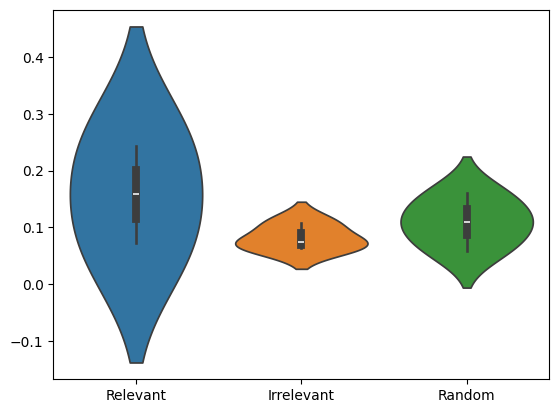

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.80486 | train_auc: 0.45938 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 1.07782 | train_auc: 0.507   | valid_auc: 1.0     |  0:00:00s
epoch 2  | loss: 1.17352 | train_auc: 0.54062 | valid_auc: 1.0     |  0:00:01s
epoch 3  | loss: 0.97314 | train_auc: 0.493   | valid_auc: 1.0     |  0:00:01s
epoch 4  | loss: 0.99052 | train_auc: 0.47339 | valid_auc: 1.0     |  0:00:01s
epoch 5  | loss: 1.01198 | train_auc: 0.46499 | valid_auc: 0.75    |  0:00:02s
epoch 6  | loss: 0.81535 | train_auc: 0.47339 | valid_auc: 0.0     |  0:00:02s
epoch 7  | loss: 0.74706 | train_auc: 0.4958  | valid_auc: 0.0     |  0:00:02s
epoch 8  | loss: 0.76817 | train_auc: 0.51541 | valid_auc: 0.0     |  0:00:03s
epoch 9  | loss: 0.99029 | train_auc: 0.54902 | valid_auc: 0.0     |  0:00:03s
epoch 10 | loss: 0.78113 | train_auc: 0.56303 | valid_auc: 0.0     |  0:00:03s
epoch 11 | loss: 0.80294 | train_auc: 0.58263 | valid_auc: 0.0     |  0:00:03s
epoch 12 | loss: 0.9458  | train_auc: 0.59664 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.008671412212541127
Average irrelevant feature importance: 0.013729531878009064
Average random feature importance: 0.0076573592875806935
Relevant feature importance: [0.01187277 0.00606139 0.00788961 0.03163381 0.00616377 0.00254213
 0.02374905 0.00881063 0.01835486 0.00496009 0.00309451 0.0027485
 0.00344175 0.00716661 0.00385065 0.00542884 0.00429371 0.00231654
 0.01999127 0.00770196 0.00324073 0.00735528 0.00677403]
Irrelevant feature importance: [0.02695272 0.00921555 0.03277817 0.00240922 0.00350562 0.00256599
 0.00836516 0.01553715 0.0038386  0.02767642 0.00506625 0.00320827
 0.00520468 0.00503036 0.01571589 0.02816301 0.0023542  0.00312407
 0.00627009 0.00538499 0.04490682 0.00329986 0.00404264 0.00156895
 0.05849613 0.00625383 0.05527434 0.00557524 0.03324305 0.00937999
 0.0107292  0.01507527 0.01985222 0.00441249 0.00427651 0.00551021]
Random feature importance: [0.00675052 0.00389403 0.00286534 0.00346943 0.0073096  0.02026735
 0.00493497

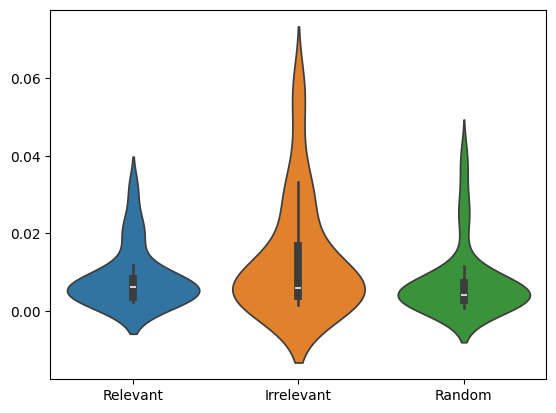

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83904 | train_auc: 0.54444 | valid_auc: 0.66667 |  0:00:01s
epoch 1  | loss: 0.823   | train_auc: 0.60278 | valid_auc: 0.33333 |  0:00:03s
epoch 2  | loss: 0.93459 | train_auc: 0.70833 | valid_auc: 0.16667 |  0:00:05s
epoch 3  | loss: 0.79902 | train_auc: 0.62778 | valid_auc: 0.16667 |  0:00:06s
epoch 4  | loss: 1.07432 | train_auc: 0.61667 | valid_auc: 0.16667 |  0:00:08s
epoch 5  | loss: 1.12584 | train_auc: 0.56944 | valid_auc: 0.16667 |  0:00:10s
epoch 6  | loss: 1.05081 | train_auc: 0.55278 | valid_auc: 0.16667 |  0:00:12s
epoch 7  | loss: 0.71802 | train_auc: 0.55    | valid_auc: 0.33333 |  0:00:13s
epoch 8  | loss: 1.03873 | train_auc: 0.54722 | valid_auc: 0.33333 |  0:00:15s
epoch 9  | loss: 1.0205  | train_auc: 0.52778 | valid_auc: 0.16667 |  0:00:17s
epoch 10 | loss: 0.84494 | train_auc: 0.51667 | valid_auc: 0.16667 |  0:00:19s
epoch 11 | loss: 0.83967 | train_auc: 0.52222 | valid_auc: 0.16667 |  0:00:20s
epoch 12 | loss: 0.67969 | train_auc: 0.52778 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.001040018864741523
Average irrelevant feature importance: 0.0009847938833937992
Average random feature importance: 0.0010197486614830138
Relevant feature importance: [1.34242603e-03 1.38002734e-04 1.22507632e-03 1.40815034e-03
 6.58035534e-03 6.53002977e-04 3.45828482e-04 4.01469870e-03
 1.12524348e-04 1.85224943e-04 4.76567508e-04 1.25539819e-03
 2.03653217e-03 9.91846131e-05 7.77953295e-04 5.37462168e-04
 1.75841607e-03 4.83036190e-04 3.74901125e-04 4.26965410e-04
 1.46347085e-03 7.00309339e-04 8.08030440e-04 9.26569857e-04
 1.48479580e-04 1.12670147e-03 2.72007264e-03 2.71067289e-04
 4.90101262e-04 7.50131589e-04 6.44433259e-04 1.02701007e-03
 1.48226476e-03 5.88049449e-04 1.33668906e-03 1.22008417e-03
 1.27860553e-04 5.56796089e-04 7.46989091e-04 2.33936806e-04]
Irrelevant feature importance: [1.44540061e-04 1.04492010e-03 2.64846061e-04 6.06715345e-04
 1.14471876e-03 1.05214712e-03 1.83523652e-03 7.55139340e-04
 1.37411727e-04 1.26611443e-03 

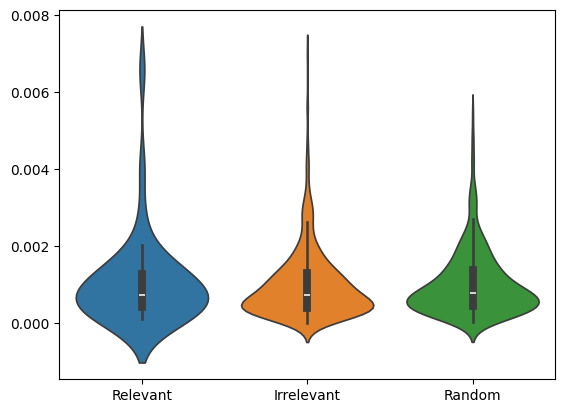

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.09865 | train_auc: 0.42628 | valid_auc: 0.54348 |  0:00:01s
epoch 1  | loss: 1.01785 | train_auc: 0.47255 | valid_auc: 0.5602  |  0:00:03s
epoch 2  | loss: 0.99557 | train_auc: 0.49164 | valid_auc: 0.56355 |  0:00:05s
epoch 3  | loss: 0.89255 | train_auc: 0.54377 | valid_auc: 0.56689 |  0:00:07s
epoch 4  | loss: 0.77814 | train_auc: 0.57084 | valid_auc: 0.55686 |  0:00:09s
epoch 5  | loss: 0.82337 | train_auc: 0.60751 | valid_auc: 0.56187 |  0:00:11s
epoch 6  | loss: 0.71984 | train_auc: 0.61104 | valid_auc: 0.51839 |  0:00:13s
epoch 7  | loss: 0.71374 | train_auc: 0.6294  | valid_auc: 0.53177 |  0:00:15s
epoch 8  | loss: 0.72251 | train_auc: 0.67962 | valid_auc: 0.57023 |  0:00:16s
epoch 9  | loss: 0.65178 | train_auc: 0.69945 | valid_auc: 0.52508 |  0:00:18s
epoch 10 | loss: 0.67902 | train_auc: 0.72539 | valid_auc: 0.58863 |  0:00:20s
epoch 11 | loss: 0.57369 | train_auc: 0.7561  | valid_auc: 0.6087  |  0:00:22s
epoch 12 | loss: 0.61647 | train_auc: 0.7822  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.17917561405503302
Average irrelevant feature importance: 0.1447993324143113
Average random feature importance: 0.04321862325156956
Relevant feature importance: [0.31052725 0.13482649 0.0921731 ]
Irrelevant feature importance: [0.09133272 0.19826594]
Random feature importance: [0.03225346 0.02873302 0.08619081 0.0256972 ]
Train AUC score: 0.9892762796537022
Validation AUC score: 1.0
Test AUC score: 0.9896103896103896
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.0


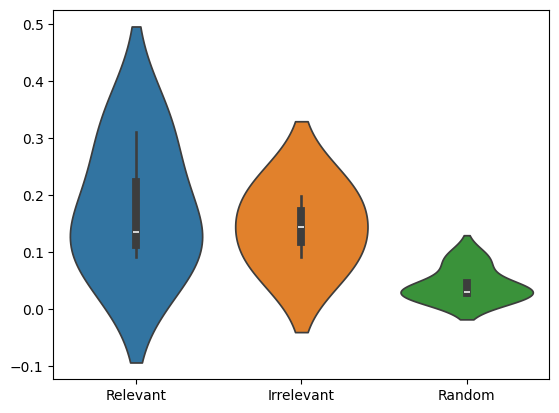

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.0395  | train_auc: 0.45049 | valid_auc: 0.39899 |  0:00:02s
epoch 1  | loss: 1.00838 | train_auc: 0.4693  | valid_auc: 0.35354 |  0:00:03s
epoch 2  | loss: 0.98136 | train_auc: 0.46771 | valid_auc: 0.39057 |  0:00:05s
epoch 3  | loss: 0.96399 | train_auc: 0.47597 | valid_auc: 0.39057 |  0:00:07s
epoch 4  | loss: 0.95077 | train_auc: 0.46851 | valid_auc: 0.48485 |  0:00:09s
epoch 5  | loss: 0.92154 | train_auc: 0.48985 | valid_auc: 0.43434 |  0:00:11s
epoch 6  | loss: 0.98888 | train_auc: 0.4801  | valid_auc: 0.46633 |  0:00:13s
epoch 7  | loss: 0.8895  | train_auc: 0.44741 | valid_auc: 0.44276 |  0:00:15s
epoch 8  | loss: 0.93559 | train_auc: 0.46977 | valid_auc: 0.5101  |  0:00:17s
epoch 9  | loss: 0.90503 | train_auc: 0.48653 | valid_auc: 0.44949 |  0:00:19s
epoch 10 | loss: 0.87754 | train_auc: 0.48031 | valid_auc: 0.49158 |  0:00:21s
epoch 11 | loss: 0.88969 | train_auc: 0.4915  | valid_auc: 0.63131 |  0:00:23s
epoch 12 | loss: 0.82983 | train_auc: 0.50123 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.014876558660758333
Average irrelevant feature importance: 0.010465167081833628
Average random feature importance: 0.007578752343779286
Relevant feature importance: [0.01431921 0.0053059  0.0870888  0.0249323  0.0048579  0.00568078
 0.01045042 0.00182561 0.02905953 0.02881598 0.00364212 0.00994943
 0.01268785 0.00558933 0.00772511 0.00268187 0.00517345 0.00799245]
Irrelevant feature importance: [0.00162196 0.00418824 0.00173613 0.00697779 0.00070089 0.00277262
 0.00895348 0.00633474 0.0052757  0.00305349 0.00283099 0.00998866
 0.00555755 0.00694118 0.00155071 0.07913712 0.00588316 0.00554327
 0.00852129 0.0186017  0.01891833 0.00347925 0.00945629 0.00898317
 0.00895923 0.01066495 0.00544229 0.0027754  0.00333382 0.00277956
 0.00904671 0.0057048  0.00155296 0.03778024 0.01868881 0.03075979
 0.03051157 0.00355087 0.01316459 0.01003281 0.00731574]
Random feature importance: [0.06188535 0.00935649 0.00596177 0.00180929 0.0075946  0.00495872
 0.00470938

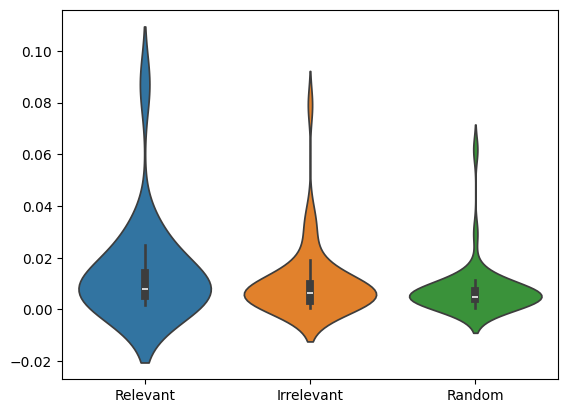

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.45263 | train_auc: 0.375   | valid_auc: 0.27583 |  0:00:04s
epoch 1  | loss: 1.28438 | train_auc: 0.38058 | valid_auc: 0.38    |  0:00:08s
epoch 2  | loss: 1.37758 | train_auc: 0.37038 | valid_auc: 0.38417 |  0:00:13s
epoch 3  | loss: 1.4058  | train_auc: 0.40828 | valid_auc: 0.44667 |  0:00:17s
epoch 4  | loss: 1.43568 | train_auc: 0.40735 | valid_auc: 0.49667 |  0:00:22s
epoch 5  | loss: 1.31459 | train_auc: 0.39785 | valid_auc: 0.5075  |  0:00:26s
epoch 6  | loss: 1.40707 | train_auc: 0.45034 | valid_auc: 0.47583 |  0:00:31s
epoch 7  | loss: 1.31761 | train_auc: 0.4195  | valid_auc: 0.41333 |  0:00:35s
epoch 8  | loss: 1.28975 | train_auc: 0.46186 | valid_auc: 0.3875  |  0:00:40s
epoch 9  | loss: 1.20613 | train_auc: 0.45569 | valid_auc: 0.49667 |  0:00:45s
epoch 10 | loss: 1.34271 | train_auc: 0.46166 | valid_auc: 0.48833 |  0:00:49s
epoch 11 | loss: 1.36958 | train_auc: 0.45192 | valid_auc: 0.5125  |  0:00:54s
epoch 12 | loss: 1.25874 | train_auc: 0.44712 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0008365325392476989
Average irrelevant feature importance: 0.0012387983133100825
Average random feature importance: 0.0007424489760282798
Relevant feature importance: [0.00050007 0.00029634 0.00036448 0.00024738 0.01845934 0.00109752
 0.00118961 0.00085492 0.00089516 0.00070847 0.00024185 0.00058863
 0.00027044 0.00043627 0.00080083 0.00045412 0.00080643 0.00016185
 0.00271561 0.00055041 0.00128139 0.00078822 0.00043086 0.00157843
 0.00038872 0.00059464 0.00077952 0.00070916 0.0007357  0.00051069
 0.00101721 0.0012516  0.00060138 0.00031549 0.00058935 0.0004694
 0.00041675 0.00026615 0.00033914 0.00056763 0.0004544  0.00020645
 0.00028911 0.00013185 0.00039919 0.00078486 0.00086257 0.00018117
 0.00030466 0.00044136 0.00027027 0.00110347 0.00137788 0.00066325
 0.00047561 0.0005037  0.00045354 0.00076842 0.00060251 0.00086127
 0.00066043 0.00166702 0.00074878 0.0007981  0.00063656 0.00063037
 0.00088506 0.00043541 0.00139835 0.00033829 0.00061902 0.

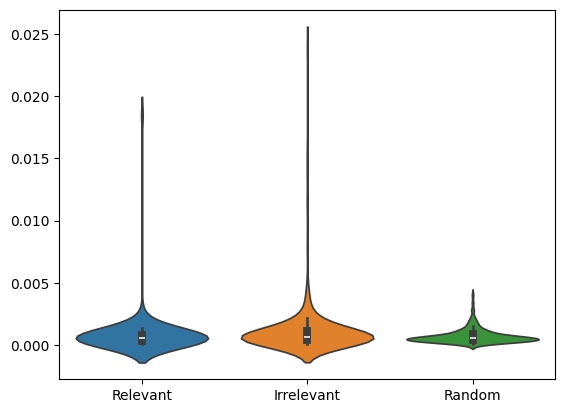

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74049 | train_auc: 0.82348 | valid_auc: 0.82005 |  0:00:16s
epoch 1  | loss: 0.59363 | train_auc: 0.85767 | valid_auc: 0.86131 |  0:00:33s
epoch 2  | loss: 0.5558  | train_auc: 0.87607 | valid_auc: 0.88294 |  0:00:50s
epoch 3  | loss: 0.51512 | train_auc: 0.89467 | valid_auc: 0.90517 |  0:01:07s
epoch 4  | loss: 0.50678 | train_auc: 0.89774 | valid_auc: 0.91071 |  0:01:23s
epoch 5  | loss: 0.50369 | train_auc: 0.90047 | valid_auc: 0.91083 |  0:01:41s
epoch 6  | loss: 0.48912 | train_auc: 0.90389 | valid_auc: 0.91211 |  0:01:58s
epoch 7  | loss: 0.47646 | train_auc: 0.9069  | valid_auc: 0.91462 |  0:02:15s
epoch 8  | loss: 0.47357 | train_auc: 0.90724 | valid_auc: 0.91585 |  0:02:32s
epoch 9  | loss: 0.47123 | train_auc: 0.9097  | valid_auc: 0.92077 |  0:02:50s
epoch 10 | loss: 0.45181 | train_auc: 0.90994 | valid_auc: 0.92031 |  0:03:07s
epoch 11 | loss: 0.47199 | train_auc: 0.90964 | valid_auc: 0.91826 |  0:03:24s
epoch 12 | loss: 0.46692 | train_auc: 0.90968 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.12344949199465471
Average irrelevant feature importance: 0.39241517516017715
Average random feature importance: 0.028446714215300976
Relevant feature importance: [0.14795348 0.10072249 0.11868363 0.12643837]
Irrelevant feature importance: [0.39241518]
Random feature importance: [0.00644253 0.01798756 0.06607619 0.02328057]
Train AUC score: 0.9196405405573487
Validation AUC score: 0.9324615384615385
Test AUC score: 0.8990440702756352
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


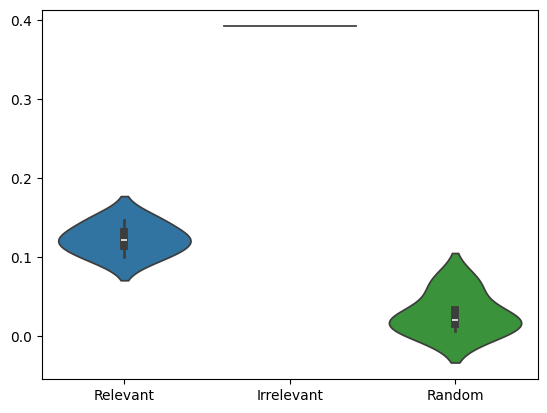

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.90467 | train_auc: 0.55217 | valid_auc: 0.53224 |  0:00:18s
epoch 1  | loss: 0.79964 | train_auc: 0.60574 | valid_auc: 0.59214 |  0:00:36s
epoch 2  | loss: 0.75581 | train_auc: 0.64023 | valid_auc: 0.64774 |  0:00:54s
epoch 3  | loss: 0.71559 | train_auc: 0.69437 | valid_auc: 0.68232 |  0:01:12s
epoch 4  | loss: 0.67903 | train_auc: 0.72892 | valid_auc: 0.72367 |  0:01:30s
epoch 5  | loss: 0.65917 | train_auc: 0.75318 | valid_auc: 0.76782 |  0:01:48s
epoch 6  | loss: 0.63699 | train_auc: 0.77817 | valid_auc: 0.76829 |  0:02:06s
epoch 7  | loss: 0.63619 | train_auc: 0.80262 | valid_auc: 0.81669 |  0:02:24s
epoch 8  | loss: 0.61681 | train_auc: 0.82863 | valid_auc: 0.85009 |  0:02:42s
epoch 9  | loss: 0.60278 | train_auc: 0.83348 | valid_auc: 0.84281 |  0:03:00s
epoch 10 | loss: 0.59108 | train_auc: 0.84397 | valid_auc: 0.84783 |  0:03:18s
epoch 11 | loss: 0.57525 | train_auc: 0.85052 | valid_auc: 0.84978 |  0:03:36s
epoch 12 | loss: 0.57304 | train_auc: 0.85759 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.009935096715409679
Average irrelevant feature importance: 0.01767227188908127
Average random feature importance: 0.0010611221363648169
Relevant feature importance: [0.0323382  0.00133089 0.00356319 0.00097678 0.00114776 0.00117171
 0.01876306 0.00025413 0.0004879  0.00840132 0.04085111]
Irrelevant feature importance: [2.39853125e-02 3.09884202e-02 1.46752196e-02 3.99416173e-02
 1.22452036e-02 3.21996077e-04 2.34882081e-03 7.46621003e-03
 7.44555723e-04 2.99748663e-04 1.11773375e-04 1.19356225e-03
 4.68413007e-03 4.53198042e-03 6.49511443e-05 3.06348865e-04
 1.48549301e-01 1.09767944e-03 7.09132014e-04 7.93030736e-02
 3.74662586e-04 2.63414308e-03 5.47179985e-04 2.79205553e-04
 2.49927772e-03 3.81909292e-03 2.52718591e-03 6.31795848e-04
 5.07649802e-02 9.87013504e-03 9.40632323e-03 7.43203459e-02
 2.96075052e-02 2.42913529e-03 1.86332050e-03 2.34539423e-02
 5.01691075e-04 1.61632577e-01 3.96192634e-04 5.70286965e-02
 7.06446467e-04 3.07155454e-03 1

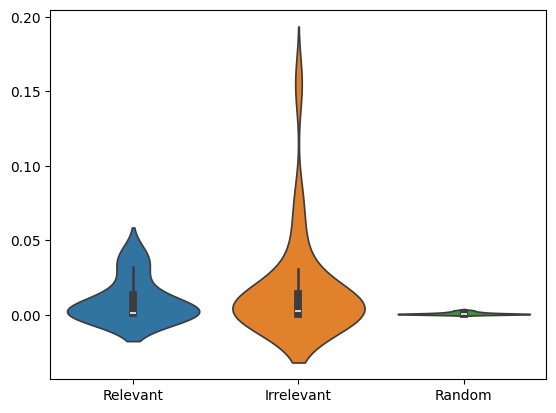

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94821 | train_auc: 0.43541 | valid_auc: 0.44455 |  0:00:38s
epoch 1  | loss: 0.92957 | train_auc: 0.452   | valid_auc: 0.43402 |  0:01:18s
epoch 2  | loss: 0.89747 | train_auc: 0.48491 | valid_auc: 0.45163 |  0:01:57s
epoch 3  | loss: 0.86723 | train_auc: 0.48067 | valid_auc: 0.43867 |  0:02:37s
epoch 4  | loss: 0.85584 | train_auc: 0.48403 | valid_auc: 0.45035 |  0:03:16s
epoch 5  | loss: 0.8333  | train_auc: 0.48159 | valid_auc: 0.43238 |  0:03:56s
epoch 6  | loss: 0.82014 | train_auc: 0.48817 | valid_auc: 0.44079 |  0:04:35s
epoch 7  | loss: 0.80618 | train_auc: 0.4814  | valid_auc: 0.47393 |  0:05:15s
epoch 8  | loss: 0.78764 | train_auc: 0.48017 | valid_auc: 0.50928 |  0:05:55s
epoch 9  | loss: 0.78094 | train_auc: 0.48929 | valid_auc: 0.43711 |  0:06:34s
epoch 10 | loss: 0.77453 | train_auc: 0.49906 | valid_auc: 0.50271 |  0:07:14s
epoch 11 | loss: 0.75716 | train_auc: 0.51576 | valid_auc: 0.5013  |  0:07:53s
epoch 12 | loss: 0.75431 | train_auc: 0.51992 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00025531380600584227
Average irrelevant feature importance: 0.0032217858386494103
Average random feature importance: 0.00018946075428793224
Relevant feature importance: [4.96857979e-03 2.09678319e-06 1.56666933e-04 5.74062418e-05
 1.42115951e-03 1.25504311e-04 1.79962124e-05 6.23801119e-05
 1.28405253e-05 5.21704537e-04 3.17215539e-04 2.28203889e-05
 3.44944619e-04 2.27390037e-04 1.47645790e-04 1.32526828e-04
 2.78725444e-04 2.52769832e-05 9.26592003e-04 4.69400443e-06
 5.90976631e-07 1.28628299e-04 2.20229051e-05 1.58400013e-04
 1.10189969e-05 2.99418459e-04 3.85687297e-06 2.18931425e-05
 1.66661822e-04 2.72079302e-04 1.07675079e-04 9.34362084e-05
 1.67208912e-04 1.97388580e-04 2.64158687e-04 9.92392985e-05
 1.71809405e-04 5.97691608e-05 6.45142218e-05 8.70539819e-05
 1.74296491e-04 1.48164760e-04 5.06170225e-03 3.44182021e-04
 2.87936816e-05 4.00226713e-06 6.98316797e-04 9.40792666e-06
 2.15903929e-04 1.64301167e-04 6.95598139e-05 1.40840382e-03

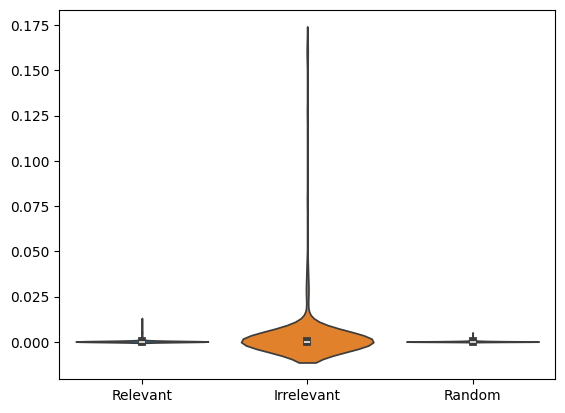

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

In [22]:
sam_df.to_csv(os.path.join("Results/SAM", "sam_data.csv"), index=False)

In [24]:
%load_ext autoreload
%autoreload 2

False negative rate for relevant features: 0.25
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


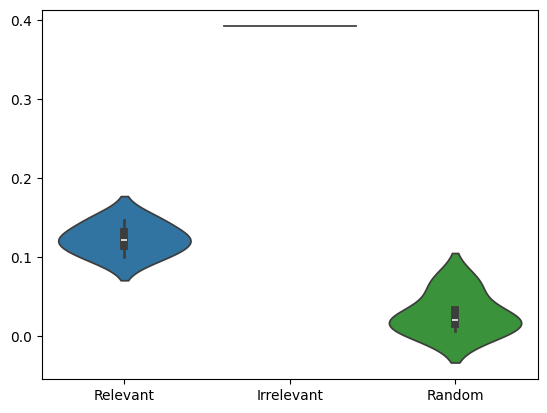

In [34]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)